### 학습목표
- 데이터 분석을 위한 시각화 방법에 대해서 알아보자~
- 데이터를 한눈에 알아보기위한 시각화를 진행하자~

### 시각화 도구 종류
1. pandas 에서 제공하는 plot 함수를 활용하여 시각화
   - 간단하고 손쉽게 그래프를 그릴때
2. 시각화 라이브러리(matplotlib, seaborn)
   - 한땀한땀 사용자화 하여 그래프 출력, 커스터마이징에 용이

In [1]:
# 라이브러리 불러오기
import numpy as np # 수치계산용 라이브러리
import pandas as pd # 행과 열을 가지는 표와 같은 데이터를 다루는 라이브러리
import matplotlib.pyplot as plt # 시각화 라이브러리
import seaborn as sns # 시각화 라이브러리 (색감다양, 다양한 그래프 포함)

In [2]:
hr_info = pd.read_csv('./data/hr-info.csv', encoding='euc-kr')
hr_info.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


In [3]:
hr_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EID                 200 non-null    object 
 1   ENAME               200 non-null    object 
 2   GENDER              200 non-null    object 
 3   ORG_CD              197 non-null    object 
 4   POS_CD              200 non-null    object 
 5   AGE                 200 non-null    int64  
 6   SERVICE_YEAR        200 non-null    int64  
 7   EDU_LEVEL           200 non-null    object 
 8   PERFORMANCE_SCORE   200 non-null    float64
 9   SALARY              200 non-null    int64  
 10  LAST_PROMO_DT       182 non-null    object 
 11  TRAINING_HOURS      200 non-null    int64  
 12  SKILLS              200 non-null    object 
 13  ACTIVE_STATE        200 non-null    object 
 14  HIRE_DATE           200 non-null    object 
 15  RETIRE_DATE         49 non-null     object 
 16  RETIRE_R

- 연도별 입사자 추세 확인

In [5]:
# 입사연,월,일 데이터 (문자열) -> 날짜타입으로 변경
hr_info['HIRE_DATE'] = pd.to_datetime(hr_info['HIRE_DATE'])

In [6]:
hr_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   EID                 200 non-null    object        
 1   ENAME               200 non-null    object        
 2   GENDER              200 non-null    object        
 3   ORG_CD              197 non-null    object        
 4   POS_CD              200 non-null    object        
 5   AGE                 200 non-null    int64         
 6   SERVICE_YEAR        200 non-null    int64         
 7   EDU_LEVEL           200 non-null    object        
 8   PERFORMANCE_SCORE   200 non-null    float64       
 9   SALARY              200 non-null    int64         
 10  LAST_PROMO_DT       182 non-null    object        
 11  TRAINING_HOURS      200 non-null    int64         
 12  SKILLS              200 non-null    object        
 13  ACTIVE_STATE        200 non-null    object        

In [7]:
# 입사 연도 추출
hr_info['HIRE_DATE'].dt.year

0      1999
1      2000
2      2002
3      2006
4      2005
       ... 
195    2024
196    2024
197    2024
198    2024
199    2024
Name: HIRE_DATE, Length: 200, dtype: int32

In [8]:
# 새로운 컬럼 "HIRE_YEAR" 컬럼 추가 후 연도 데이터 담기
hr_info['HIRE_YEAR'] = hr_info['HIRE_DATE'].dt.year

In [9]:
hr_info.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,HIRE_YEAR
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,1999
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,...,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,2000
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,...,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,2002
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,...,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,2006
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,...,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,2005


In [26]:
# 각 연도별 입사자 수 정리 -> 연도순 정렬 (index)
hire_year_rs = hr_info['HIRE_YEAR'].value_counts().sort_index()
hire_year_rs

HIRE_YEAR
1999     1
2000     1
2002     1
2004     4
2005     4
2006     4
2010     7
2011     7
2012     8
2015    12
2016    12
2017    12
2022    25
2023    29
2024    73
Name: count, dtype: int64

In [34]:
hire_year_rs = hr_info['HIRE_YEAR'].value_counts().sort_index()
hire_year_rs

HIRE_YEAR
1999     1
2000     1
2002     1
2004     4
2005     4
2006     4
2010     7
2011     7
2012     8
2015    12
2016    12
2017    12
2022    25
2023    29
2024    73
Name: count, dtype: int64

<Axes: xlabel='HIRE_YEAR', ylabel='HIRE_COUNT'>

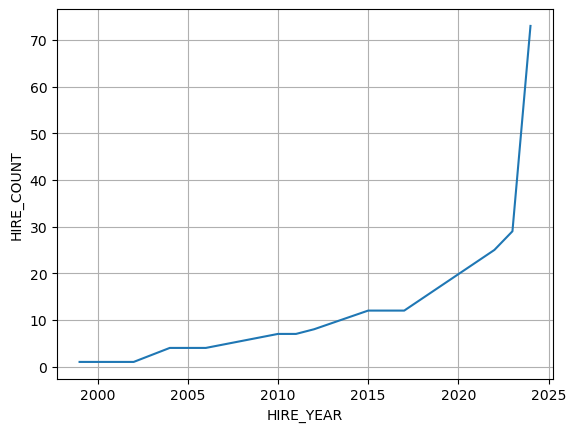

In [35]:
# 데이터.plot() : pandas 에서 제공하는 시각화 기능
hire_year_rs.plot(kind = 'line',
                ylabel = 'HIRE_COUNT',
                 grid = True)

- 학위별 평균 연봉을 비교하는 시각화 (막대그래프 출력)

In [41]:
# 학위별 평균 연봉 출력 -> groupby
mean_salary = hr_info[['EDU_LEVEL','SALARY']].groupby(by = 'EDU_LEVEL').mean().round(1)
mean_salary

,SALARY
EDU_LEVEL,
고등학교 졸업,6140.0
박사 학위,8166.7
석사 학위,6900.0
전문대 학위,5050.0
학사 학위,5727.0


In [43]:
# 주피터 노트북 -> 그래프에 한글출력을 위하여 인코딩
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

In [54]:
ms_sort = mean_salary.loc[['고등학교 졸업', '전문대 학위','학사 학위','석사 학위' ,'박사 학위']]

<Axes: ylabel='EDU_LEVEL'>

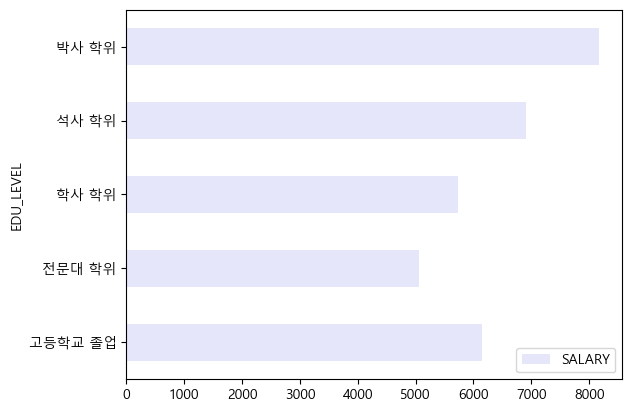

In [64]:
ms_sort.plot(kind = 'barh', color = 'lavender')

- 학위, 성별을 고려한 평균 연봉 시각화

<Axes: xlabel='EDU_LEVEL,GENDER'>

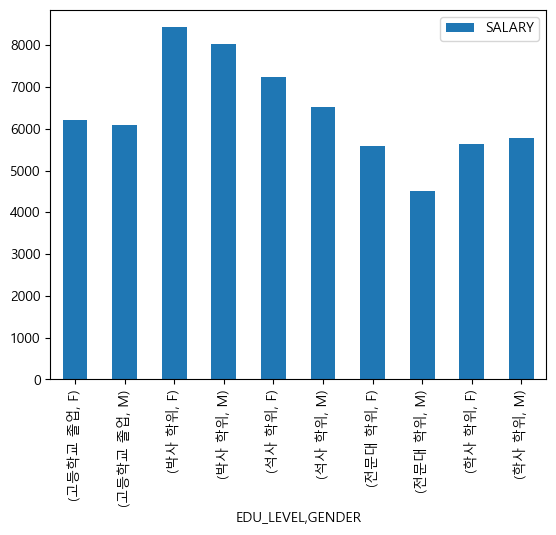

In [69]:
hr_info[['EDU_LEVEL','GENDER','SALARY']].groupby(by = ['EDU_LEVEL','GENDER']).mean().round().plot(kind = 'bar')

In [74]:
# 데이터 재구조화 -> pivot table
# 인덱스 (EDU_LEVEL)
temp = hr_info[['EDU_LEVEL','GENDER','SALARY']].groupby(by = ['EDU_LEVEL','GENDER']).mean().round()
edu_gen_mean = temp.reset_index().pivot(index = 'EDU_LEVEL', columns='GENDER', values='SALARY')
edu_gen_mean

GENDER,F,M
EDU_LEVEL,,
고등학교 졸업,6200.0,6100.0
박사 학위,8425.0,8038.0
석사 학위,7233.0,6525.0
전문대 학위,5600.0,4500.0
학사 학위,5643.0,5785.0


<Axes: ylabel='EDU_LEVEL'>

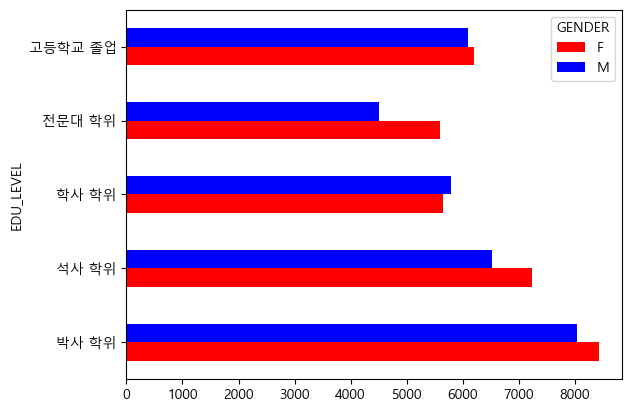

In [82]:
edu_gen_mean.loc[['박사 학위', '석사 학위','학사 학위','전문대 학위','고등학교 졸업']].plot(kind = 'barh' ,color = ['red','blue'])

<Axes: ylabel='EDU_LEVEL'>

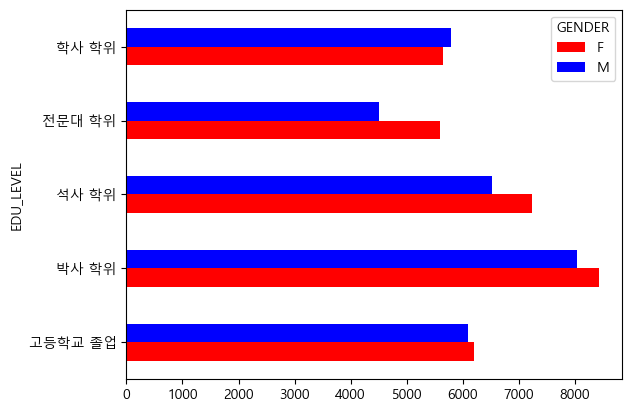

In [78]:
edu_gen_mean.plot(kind = 'barh' ,color = ['red','blue'])

array([<Axes: title={'center': 'F'}, ylabel='EDU_LEVEL'>,
       <Axes: title={'center': 'M'}, ylabel='EDU_LEVEL'>], dtype=object)

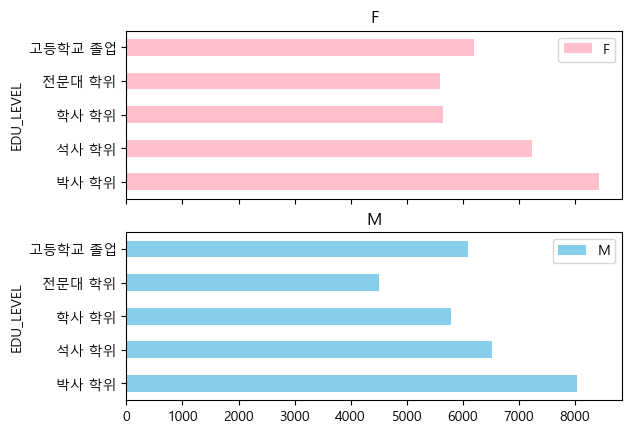

In [87]:
eg_sort = edu_gen_mean.loc[['박사 학위', '석사 학위','학사 학위','전문대 학위','고등학교 졸업']]
eg_sort.plot(kind = 'barh', subplots = True, color = ['pink','skyblue'])

array([<Axes: title={'center': 'F'}, ylabel='EDU_LEVEL'>,
       <Axes: title={'center': 'M'}, ylabel='EDU_LEVEL'>], dtype=object)

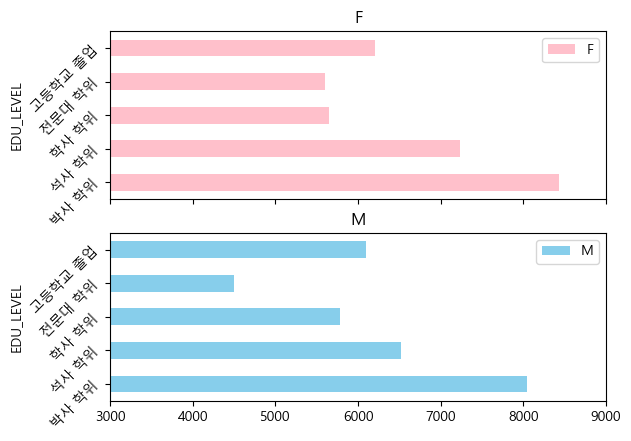

In [102]:
eg_sort.plot(kind = 'barh', subplots = True, color = ['pink','skyblue'], xlim = (3000,9000) , rot = 45)

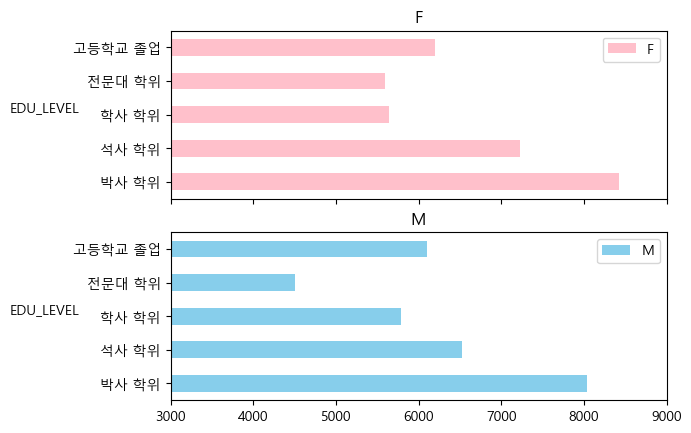

In [104]:
axes = eg_sort.plot(
    kind='barh',
    subplots=True,
    color=['pink', 'skyblue'],
    xlim=(3000, 9000)
)

for ax in axes:
    ax.set_ylabel('EDU_LEVEL', rotation=0, labelpad = 20) 

In [105]:
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,HIRE_YEAR
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,1999
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,...,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,2000
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,...,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,2002
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,...,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,2006
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,...,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,...,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,...,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,...,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,...,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024


- 학위별 비율 시각화
  - pie 차트 

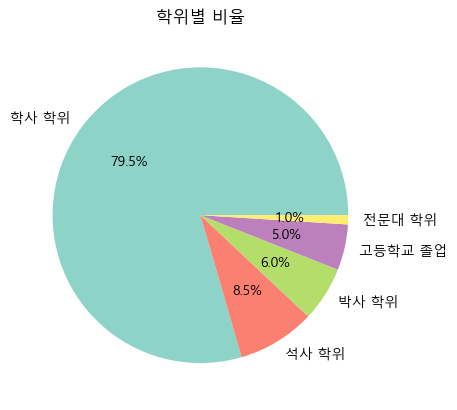

In [117]:
hr_info['EDU_LEVEL'].value_counts().plot(kind = 'pie',
                                        autopct = '%.1f%%',
                                        title = '학위별 비율',
                                        colormap = 'Set3',
                                        ylabel = '',
                                        counterclock = False)
plt.show()

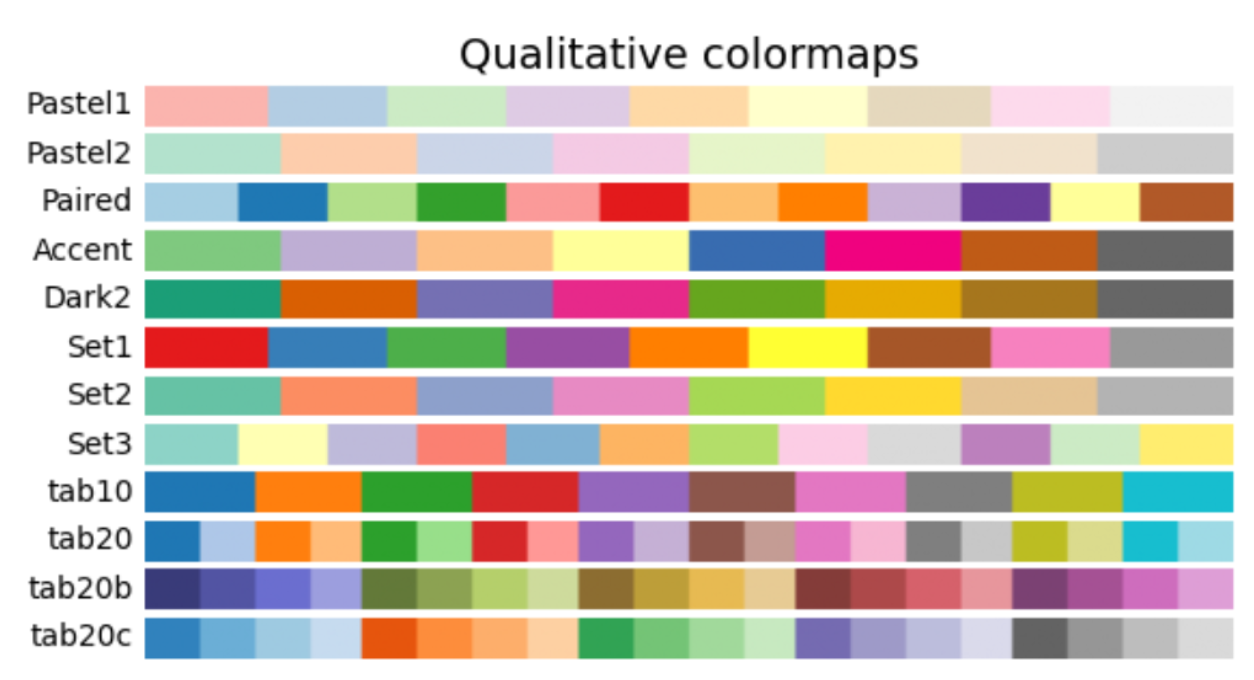

### matplotlib 을 활용한 그래프 시각화

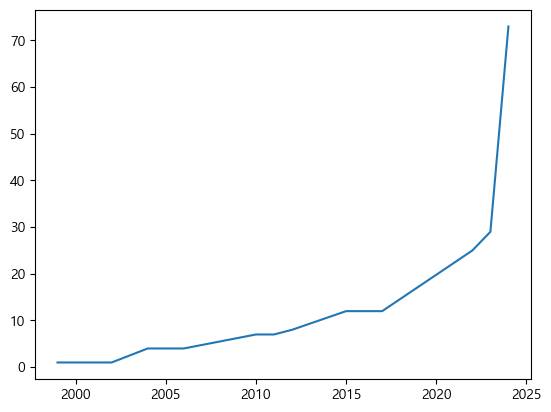

In [119]:
# plt.plot(데이터 셋)
plt.plot(hire_year_rs)
plt.show()

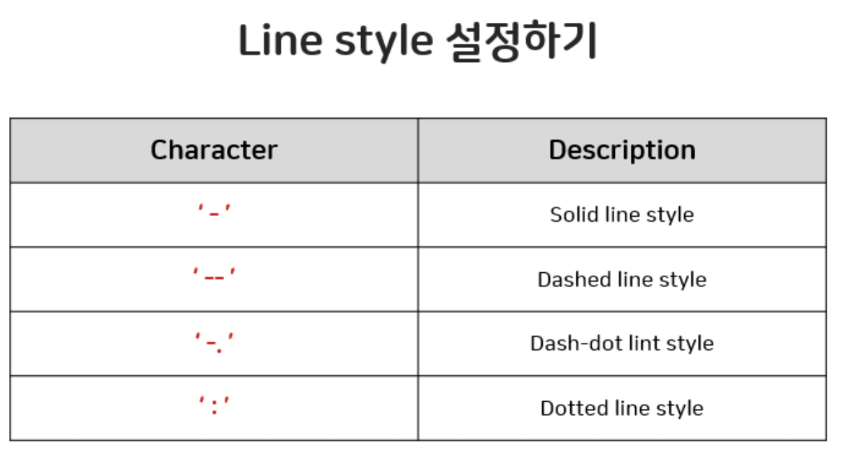

In [143]:
hire_year_rs.index

Index([1999, 2000, 2002, 2004, 2005, 2006, 2010, 2011, 2012, 2015, 2016, 2017,
       2022, 2023, 2024],
      dtype='int32', name='HIRE_YEAR')

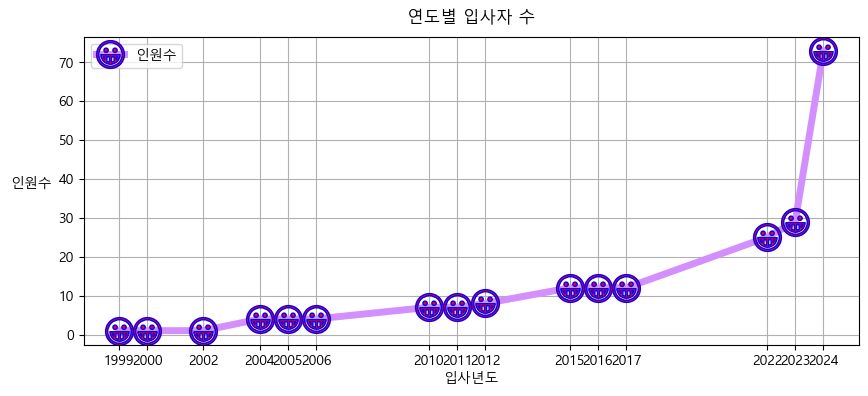

In [163]:
plt.figure(figsize = (10,4))
plt.plot(hire_year_rs,
        ls = '-',   # line style : 선의 종류
        lw = 5,     # line width : 선의 두께
        color = '#D48FFFFF',  # 선의 색
         marker = '$😀$',   # marker 표시
         mfc = 'red',    # marker face color : 마커 색
         mec = 'blue',   # marker edge color : 마커 선 색
         ms = 20,        # marker size : 마커 크기
         mew = 1 ,        # marker egde width : 마커 선 두께
        label = '인원수')
plt.grid()
plt.xticks(hire_year_rs.index)
plt.xlabel('입사년도')
plt.ylabel('인원수', labelpad = 20).set_rotation(0)
plt.title('연도별 입사자 수', pad = 10)
plt.legend()
plt.show()

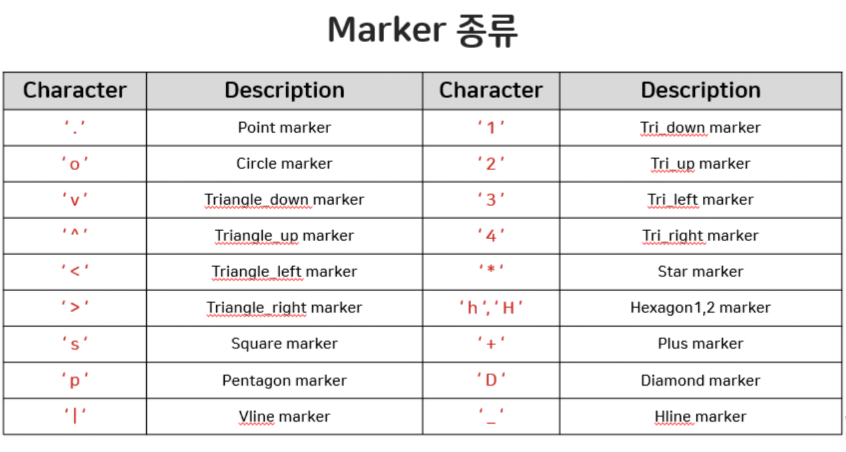

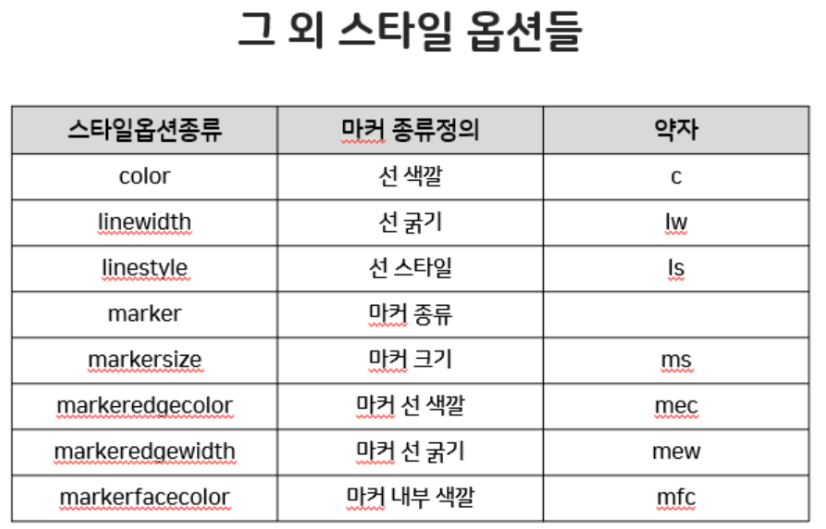

- 하나의 차트에 여러개의 plot 그리기

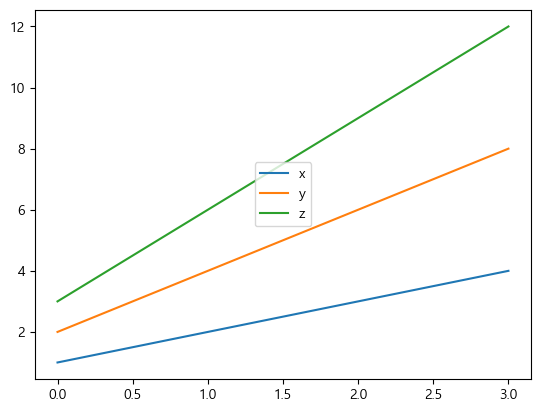

In [168]:
x = [1,2,3,4]
y = [2,4,6,8]
z = [3,6,9,12]
plt.plot(x, label = 'x')
plt.plot(y, label = 'y')
plt.plot(z, label= 'z')
plt.legend(loc = 'center')

- matplotlib 에서 bar 차트 그리는법~

<BarContainer object of 15 artists>

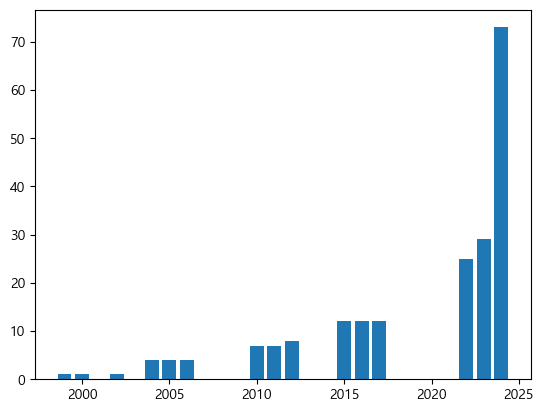

In [172]:
# x축 -> 연도, y 축 인원수
x = hire_year_rs.index
y = hire_year_rs.values
plt.bar(x,y)